# Data Exploration

In [ ]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from scipy import stats

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
red = pd.read_csv('/content/drive/MyDrive/School/d. Undergrad/Year 2/Spring/CSC 240/Final Project/winequality-red.csv',delimiter=';')

In [ ]:
red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
import plotly.express as px
fig = px.parallel_coordinates(red, color = 'quality',dimensions = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'], color_continuous_scale = px.colors.diverging.Tealrose, color_continuous_midpoint = 5)
fig.show()

In [ ]:
red.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
#for with a skew of more than 0.5, perform box-cox normalization
def normalize(column):
  transform = np.asarray(column.values);
  dft = stats.boxcox(transform)[0]
  return dft;

In [ ]:
red.skew(axis = 0)

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

In [ ]:
red['fixed acidity'] = normalize(red['fixed acidity'])
red['volatile acidity'] = normalize(red['volatile acidity'])
red['residual sugar'] = normalize(red['residual sugar'])
red['chlorides'] = normalize(red['chlorides'])
red['free sulfur dioxide'] = normalize(red['free sulfur dioxide'])
red['total sulfur dioxide'] = normalize(red['total sulfur dioxide'])
red['sulphates'] = normalize(red['sulphates'])
red['alcohol'] = normalize(red['alcohol'])
red.skew()

fixed acidity           0.000517
volatile acidity        0.000596
citric acid             0.318337
residual sugar         -0.095930
chlorides              -0.499643
free sulfur dioxide    -0.019778
total sulfur dioxide   -0.008028
density                 0.071288
pH                      0.193683
sulphates              -0.024779
alcohol                 0.109367
quality                 0.217802
dtype: float64

In [ ]:
fig = px.parallel_coordinates(red, color = 'quality',dimensions = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'], color_continuous_scale = px.colors.diverging.Tealrose, color_continuous_midpoint = 5)
fig.show()

In [ ]:
#Common industry practice is to use 3 standard deviations away from the mean to
#differentiate outlier from non-outlier
for attribute in red:
  mean = red[attribute].mean()
  sd = red[attribute].std()
  red = red[(red[attribute] <= mean+(3*sd))]
red.skew()

fixed acidity           0.053410
volatile acidity       -0.080032
citric acid             0.297804
residual sugar         -0.110613
chlorides              -1.758628
free sulfur dioxide    -0.018384
total sulfur dioxide   -0.020916
density                -0.090055
pH                      0.089211
sulphates              -0.189034
alcohol                 0.097552
quality                 0.245734
dtype: float64

In [ ]:
fig = px.parallel_coordinates(red, color = 'quality',dimensions = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'], color_continuous_scale = px.colors.diverging.Tealrose, color_continuous_midpoint = 5)
fig.show()

In [ ]:
#drop least useful attributes
red.drop(['fixed acidity'],axis = 1, inplace = True)
red.drop(['free sulfur dioxide'],axis = 1, inplace = True)
red.drop(['citric acid'],axis = 1, inplace = True)

In [ ]:
fig = px.parallel_coordinates(red, color = 'quality',dimensions = ['volatile acidity', 'residual sugar', 'chlorides', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'], color_continuous_scale = px.colors.diverging.Tealrose, color_continuous_midpoint = 5)
fig.show()

In [ ]:
red['quality'].value_counts()

5    655
6    622
7    194
4     51
8     18
3      8
Name: quality, dtype: int64


#Naive Bayes Classifier

##Feature Declaration



In [ ]:
#declare feature vector and target variable
X = red.drop(['quality'],axis = 1)
Y = red['quality']

In [ ]:
#split data into separate training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

In [ ]:
#check the shape of the training and testing sets
X_train.shape, X_test.shape

((1083, 8), (465, 8))

##Feature Scaling

In [ ]:
cols = X_train.columns

In [ ]:
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train = pd.DataFrame(X_train,columns = [cols])
X_test = pd.DataFrame(X_test, columns = [cols])

##Model Training

In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state = 42)
clf.fit(X_train,Y_train)

gnb = GaussianNB()
gnb.fit(X_train,Y_train)

GaussianNB()

In [ ]:
clf_Y_pred = clf.predict(X_test)
Y_pred = gnb.predict(X_test)

In [ ]:
#add a method to calculate error within a certain range to get a better picture
from sklearn.metrics import mean_absolute_error
print('GNB model accuracy score: {0:0.4f}'.format(accuracy_score(Y_test,Y_pred)))
print('CLF model accuracy score: {0:0.4f}'.format(accuracy_score(Y_test,clf_Y_pred)))

GNB model accuracy score: 0.5828
CLF model accuracy score: 0.5785


In [ ]:
Y_pred_train = gnb.predict(X_train)

##Analysis

In [ ]:
#check for overfitting and underfitting
print('GNB training set score: {:.4f}'.format(gnb.score(X_train,Y_train)))
print('GNB test set score: {:.4f}'.format(gnb.score(X_test,Y_test)))

print('CLF training set score: {:.4f}'.format(clf.score(X_train,Y_train)))
print('CLF test set score: {:.4f}'.format(clf.score(X_test,Y_test)))

GNB training set score: 0.6140
GNB test set score: 0.5828
CLF training set score: 0.6140
CLF test set score: 0.5785


In [ ]:
def accuracyWithin(test,pred):
  normal = 0
  within1  = 0
  within2 = 0
  within3 = 0

  t = test.to_numpy()
  for x in range(len(test)):
    diff = abs(t[x] - pred[x])
    if diff == 0:
      normal += 1
      within1 += 1
      within2 += 1
      within3 += 1  
    elif diff <= 1:
      within1 += 1
      within2 += 1
      within3 += 1
    elif diff <= 2:
      within2 += 1
      within3 += 1
    elif diff <= 3:
      within3 += 1

  normal = normal/len(test)
  within1 = within1/len(test)
  within2 = within2/len(test)
  within3 = within3/len(test)

  return normal, within1, within2, within3

In [ ]:
gnbAcc, gnbAcc1, gnbAcc2, gnbAcc3 = accuracyWithin(Y_test,Y_pred)
clfAcc, clfAcc1, clfAcc2, clfAcc3 = accuracyWithin(Y_test,clf_Y_pred)

In [ ]:
print('gnb acc: {:.4f}'.format(gnbAcc))
print('clf acc: {:.4f}'.format(clfAcc))

print('gnb acc1: {:.4f}'.format(gnbAcc1))
print('clf acc1: {:.4f}'.format(clfAcc1))

print('gnb acc2: {:.4f}'.format(gnbAcc2))
print('clf acc2: {:.4f}'.format(clfAcc2))

print('gnb acc3: {:.4f}'.format(gnbAcc3))
print('clf acc3: {:.4f}'.format(clfAcc3))

gnb acc: 0.5828
clf acc: 0.5785
gnb acc1: 0.9441
clf acc1: 0.9656
gnb acc2: 0.9957
clf acc2: 0.9978
gnb acc3: 1.0000
clf acc3: 1.0000


There does not appear to be any sever over- or under-fitting in this model. Though perhaps slightly overfit, it is not by a significant margin, and is therefore not a significant concern in this analysis.

In [ ]:
#check the null accuracy 
print(Y_test.value_counts())

6    192
5    189
7     63
4     17
3      2
8      2
Name: quality, dtype: int64


In [ ]:
#class 0 (bad wines) is the most frequent, so find null accuracy by dividing 709 by total observations
null_accuracy = 308/(720)
print('Null accuracy score: {0:0.4f}'.format(null_accuracy))

Null accuracy score: 0.4278


Null accuracy: accuracy that could be achieved by always predicting the most frequent class. My model actually doesn't do a very good job at predicting the quality of the wines at all, as this demonstrates. **How can I improve this model? Do I really want to put the energy into improving it?**

In [ ]:
#print the confusion matrix and slice it into four pieces
from sklearn.metrics import confusion_matrix
gnbcm = confusion_matrix(Y_test,Y_pred)
clfcm = confusion_matrix(Y_test,clf_Y_pred)

print(gnbcm)
print(clfcm)

[[  0   0   2   0   0   0]
 [  0   3   5   8   1   0]
 [  0   3 147  37   2   0]
 [  1   3  71  99  17   1]
 [  0   0   7  31  22   3]
 [  0   0   0   1   1   0]]
[[  0   0   2   0   0   0]
 [  0   0   9   7   1   0]
 [  0   0 141  47   1   0]
 [  0   0  74 107  11   0]
 [  0   0   4  38  21   0]
 [  0   0   0   1   1   0]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred))
print(classification_report(Y_test,clf_Y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.33      0.18      0.23        17
           5       0.63      0.78      0.70       189
           6       0.56      0.52      0.54       192
           7       0.51      0.35      0.42        63
           8       0.00      0.00      0.00         2

    accuracy                           0.58       465
   macro avg       0.34      0.30      0.31       465
weighted avg       0.57      0.58      0.57       465

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        17
           5       0.61      0.75      0.67       189
           6       0.54      0.56      0.55       192
           7       0.60      0.33      0.43        63
           8       0.00      0.00      0.00         2

    accuracy                           0.58       465
   macro avg       0.29

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
Y_pred_prob = pd.DataFrame(gnb.predict_proba(X_test))

In [ ]:
from sklearn.preprocessing import LabelBinarizer

label_binarizer = LabelBinarizer().fit(Y_train)
bin_test = label_binarizer.transform(Y_test)
bin_test.shape

gnb_score = gnb.predict_proba(X_test)
clf_score = clf.predict_proba(X_test)

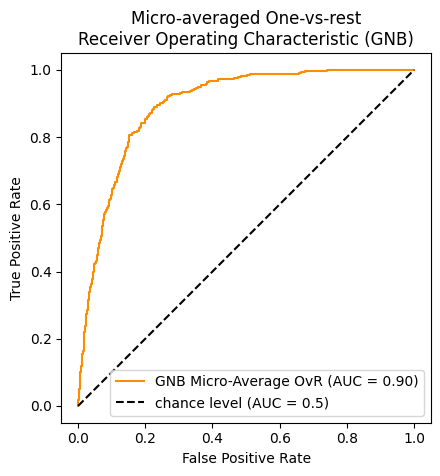

In [ ]:
#ROC curve using micro-averaged OvR
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(
    bin_test.ravel(),
    gnb_score.ravel(),
    name = "GNB Micro-Average OvR",
    color = "darkorange"
)
plt.plot([0,1],[0,1],"k--",label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Micro-averaged One-vs-rest\nReceiver Operating Characteristic (GNB)")
plt.legend()
plt.show()

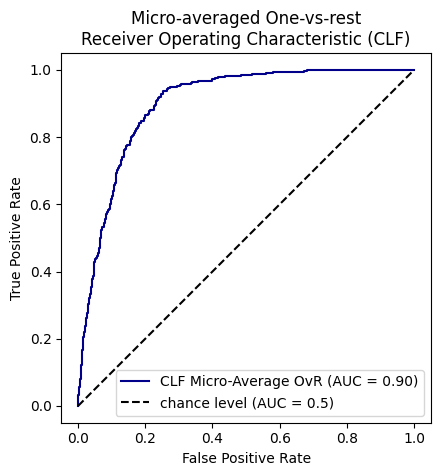

In [ ]:
RocCurveDisplay.from_predictions(
    bin_test.ravel(),
    clf_score.ravel(),
    name = "CLF Micro-Average OvR",
    color = "darkblue"
)
plt.plot([0,1],[0,1],"k--",label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Micro-averaged One-vs-rest\nReceiver Operating Characteristic (CLF)")
plt.legend()
plt.show()

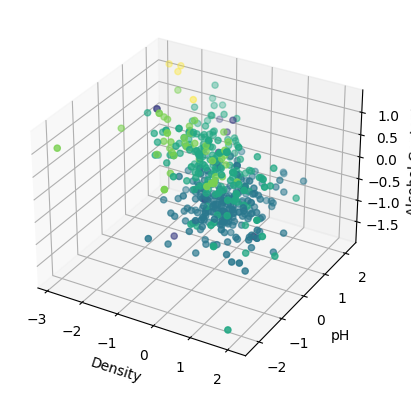

In [ ]:
# Import necessary libraries
from mpl_toolkits.mplot3d import Axes3D

# Create 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
quality = Y_test.tolist()
colors = ['red', 'orange', 'yellow', 'green', 'blue', 'purple']
quality_colors = [colors[i-3] for i in quality]
ax.scatter(X_test['density'], X_test['pH'], X_test['alcohol'], c=Y_pred)

# Set axis labels
ax.set_xlabel('Density')
ax.set_ylabel('pH')
ax.set_zlabel('Alcohol Content')

plt.show()

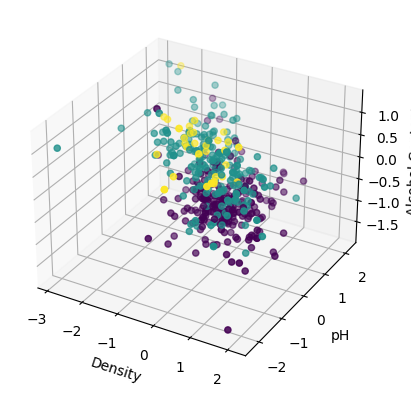

In [ ]:
# Create 3D scatter plot
fig2 = plt.figure()
ax = fig2.add_subplot(111, projection='3d')
quality = Y_test.tolist()
colors = ['red', 'orange', 'yellow', 'green', 'blue', 'purple']
quality_colors = [colors[i-3] for i in quality]
ax.scatter(X_test['density'], X_test['pH'], X_test['alcohol'], c=clf_Y_pred)

# Set axis labels
ax.set_xlabel('Density')
ax.set_ylabel('pH')
ax.set_zlabel('Alcohol Content')

plt.show()